In [1]:
!pip  install  pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 23.0 MB/s 
     |████████████████████████████████| 1.8 MB 61.5 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=e226d154d42d6b15dffff8c4b9d3068bbe299594048f06f26144154c3f35f25d
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [2]:
import pymc3 as pm
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import pymc3 as pm
import math
from statistics import mean, stdev

# 1. Set data, likelihood,  prior distribution

In [3]:
dx = [-1.416+1.500-(-0.478+0.552), 
     -1.221+1.500-(-0.544+0.552), 
     -1.054+1.500-(-0.368+0.552), 
     -1.079+1.500-(-0.350+0.552), 
     -1.012+1.500-(-0.317+0.552), 
     -0.999+1.500-(-0.272+0.552), 
     -0.733+1.500-(-0.396+0.552)]

The dx value can be given by:

$dx(i)=\Theta {{(a,b,c,\alpha )}^{T}}X(i)+\varepsilon (i)$

where dx(i) represents the i th observed data, $\Theta {{(a,b,c,\alpha )}^{T}}X(i)$ represents the rule given by the equations in fig2. ɛ represents the error between the mathematical rule and observed data.

The distribution of ɛ is gussian distribution:

$p(\varepsilon (i))\sim\frac{1}{\sqrt{2\pi }}\exp (-\frac{\varepsilon {{(i)}^{2}}}{2{{\sigma }^{2}}})$

So the probalility of dx with given a,b,c,α is:

$p(dx(i)|X(i),a,b,c,\alpha )\sim\frac{1}{\sqrt{2\pi }}\exp (-\frac{{{(dx(i)-\Theta {{(a,b,c,\alpha )}^{T}}X(i))}^{2}}}{2{{\sigma }^{2}}})$

The likelihood function is:

$L(dx|a,b,c,\alpha )=\prod\limits_{i=1}^{m}{p(dx(i)|X(i),a,b,c,\alpha )}=\prod\limits_{i=1}^{m}{\frac{1}{\sqrt{2\pi }}\exp (-\frac{{{(dx(i)-\Theta {{(a,b,c,\alpha )}^{T}}X(i))}^{2}}}{2{{\sigma }^{2}}})}$

$logL(dx|a,b,c,\alpha )=\log \prod\limits_{i=1}^{m}{\frac{1}{\sqrt{2\pi }}\exp (-\frac{{{(dx(i)-\Theta {{(a,b,c,\alpha )}^{T}}X(i))}^{2}}}{2{{\sigma }^{2}}})}$

$logL(dx|a,b,c,\alpha )=m\log \frac{1}{\sqrt{2\pi }}-\frac{1}{2{{\sigma }^{2}}}\sum\limits_{\text{i}=1}^{\text{m}}{{{(dx(i)-\Theta {{(a,b,c,\alpha )}^{T}}X(i))}^{2}}}$


In this study we can use the simplified $logL$:

$Likelihood(dx|a,b,c,\alpha )=-\frac{1}{2\sigma _{0}^{2}}\sum\limits_{\text{i}=1}^{\text{m}}{{{(dx(i)-\Theta {{(a,b,c,\alpha )}^{T}}X(i))}^{2}}}$

Where m is 7, as there are 7 pieces of observed data.


In [4]:
sigma0 = stdev(dx)

In [5]:
pm.set_tt_rng(1)

with pm.Model() as model:
    # Define the prior distributions for the model parameters
    a = pm.Uniform('a', lower=-1, upper=1)
    b = pm.Uniform('b', lower=-1, upper=1)
    c = pm.Uniform('c', lower=-1, upper=1)
    alpha = pm.Uniform('alpha', lower=-1, upper=1)

    # Define the likelihood function
    likelihood = -1/2*((dx[0]-(c-0.160*b-1.261*a-0.587*alpha))**2/(2*sigma0**2)+
                     (dx[1]-(c-1.107*b-0.160*a-0.557*alpha))**2/(2*sigma0**2)+
                     (dx[2]-(c+0.472*b+0.334*a-0.186*alpha))**2/(2*sigma0**2)+
                     (dx[3]-(c+0.360*b+0.348*a-0.222*alpha))**2/(2*sigma0**2)+
                     (dx[4]-(c+1.099*b+0.587*a+0.080*alpha))**2/(2*sigma0**2)+
                     (dx[5]-(c+1.321*b+0.860*a+0.158*alpha))**2/(2*sigma0**2)+
                     (dx[6]-(c-0.328*b+1.079*a+1.540*alpha))**2/(2*sigma0**2))

    pm.Potential('obs', likelihood)



The code above defined the MCMC likelihood function, the mcmc model and the uniform prior distribution of a, b, c, and alpha. The range of the uniform distributions are from -1 to 1.

Details of the above likelihood function can be seen in the appendix.

## No-U-Turn Sampler (NUTS)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


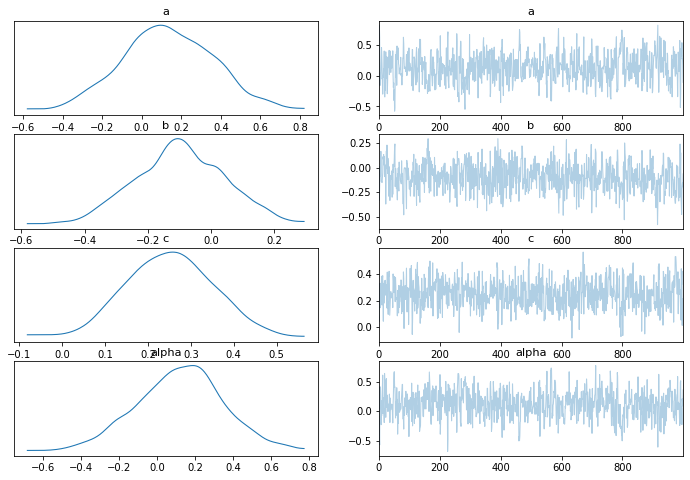

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.132,0.233,-0.305,0.573,0.011,0.008,428.0,526.0,NaN
b,-0.098,0.143,-0.349,0.181,0.007,0.005,464.0,582.0,NaN
c,0.250,0.103,0.078,0.454,0.004,0.003,632.0,696.0,NaN
alpha,0.119,0.231,-0.347,0.528,0.010,0.008,509.0,502.0,NaN


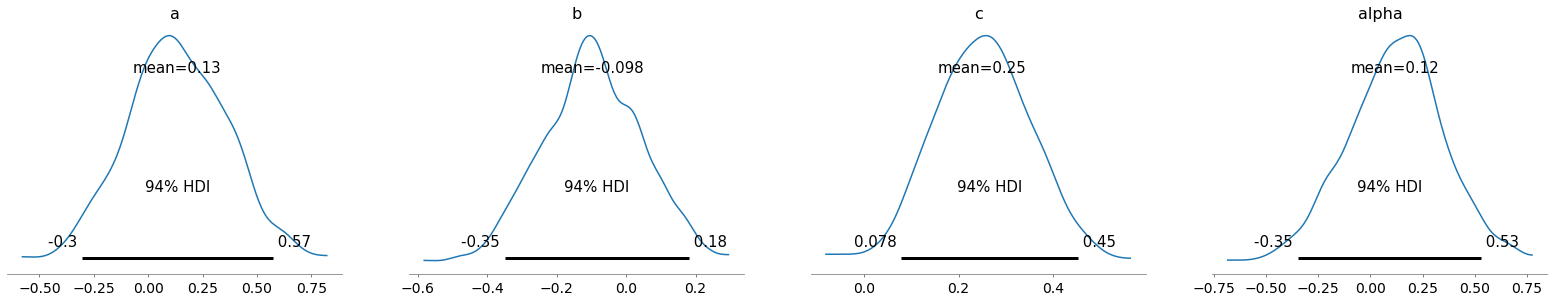

In [6]:
with model:
    trace_NUTS = pm.sample(draws=1000, chains=1)

pm.plot_trace(trace_NUTS)
plt.show()
pm.plot_posterior(trace_NUTS, var_names=['a', 'b', 'c', 'alpha'])
pm.summary(trace_NUTS)


NUTS is the default sampler in pymc3. It's a Hamiltonian Monte Carlo algorithm which approximates multivariate distributions. It is designed to provide accurate estimates of posterior quantities.

The above result show that the mean of alpha is 0.11, 0.11 * 45.3 = 4.983. The result is closer to the GR model.

## Metropolis-Histings

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


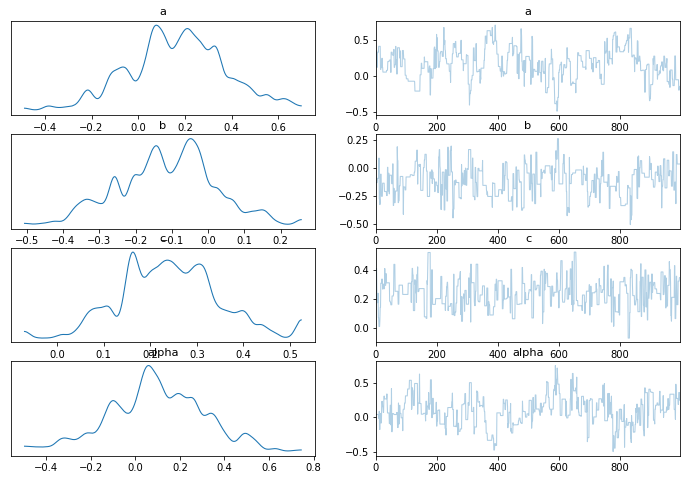

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.167,0.211,-0.234,0.555,0.038,0.027,31.0,78.0,NaN
b,-0.113,0.129,-0.364,0.118,0.012,0.009,115.0,149.0,NaN
c,0.241,0.102,0.046,0.412,0.007,0.005,224.0,192.0,NaN
alpha,0.096,0.212,-0.307,0.502,0.038,0.027,31.0,63.0,NaN


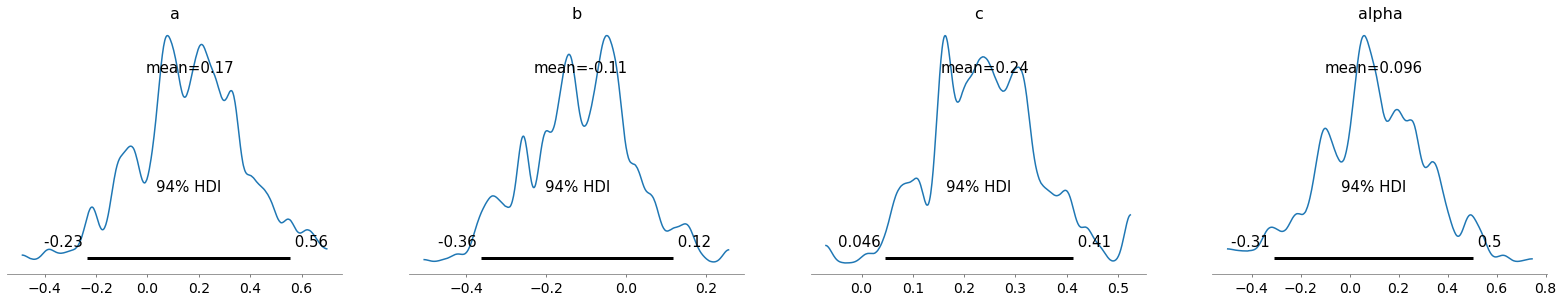

In [7]:
with model:
    trace_MH = pm.sample(draws=1000, chains=1, step=pm.Metropolis())

pm.plot_trace(trace_MH)
plt.show()
pm.plot_posterior(trace_MH, var_names=['a', 'b', 'c', 'alpha'])
pm.summary(trace_MH)


The Metropolis-Hastings algorithm has the same goal. It proceeds by iteratively proposing a new state for the system and either accepting or rejecting the proposal according to a probability function called the acceptance ratio.

The above result show that the mean of alpha is also 0.11, 0.11 * 45.3 = 4.983. The result is closer to the GR model.

## Number of samples

### Number of samples: 10

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (10) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/a

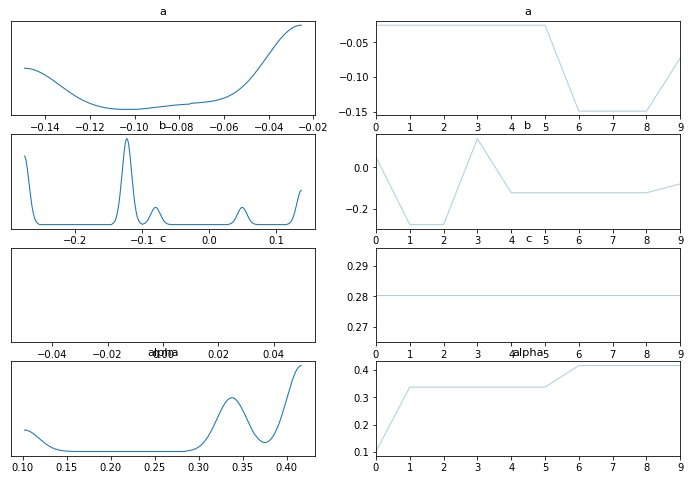

In [8]:
with model:
    trace_MH_SMALL = pm.sample(draws=10, chains=1, step=pm.Metropolis(proposal_sd=0.0001),random_seed=1)

pm.plot_trace(trace_MH_SMALL)
plt.show()

# pm.plot_posterior(trace_MH_SMALL, var_names=['a', 'b', 'c', 'alpha'])
# pm.summary(trace_MH_SMALL)

The result indicates that with 10 samples the model is not able to converge. This indicates that the MCMC algorithm is not yet fully exploring the parameter space, can't accurately estimate posterior quantities

### Number of samples: 100

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (100) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


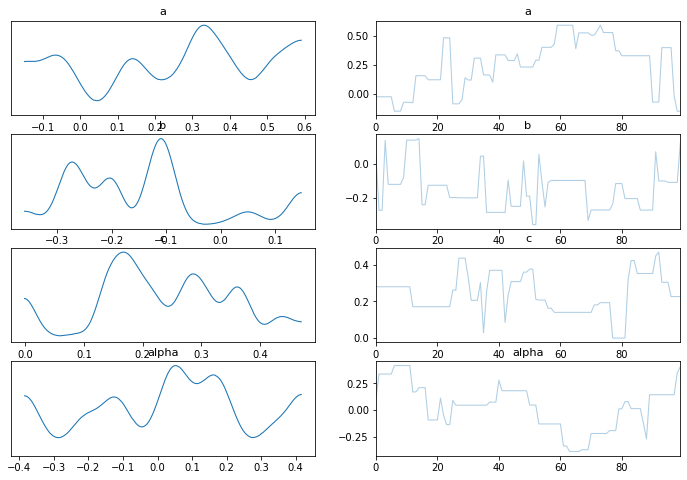

In [9]:
with model:
    trace_MH_MIDDLE = pm.sample(draws=100, chains=1, step=pm.Metropolis(proposal_sd=0.0001),random_seed=1)

pm.plot_trace(trace_MH_MIDDLE)
plt.show()

# pm.plot_posterior(trace_MH_MIDDLE, var_names=['a', 'b', 'c', 'alpha'])
# pm.summary(trace_MH_MIDDLE)

The result indicates that  when there are 100 samples, variables haven't fluctuate around a stable value so the model haven't converged. There is not a smooth distribution of posterior parameters.

### Number of samples: 1000

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


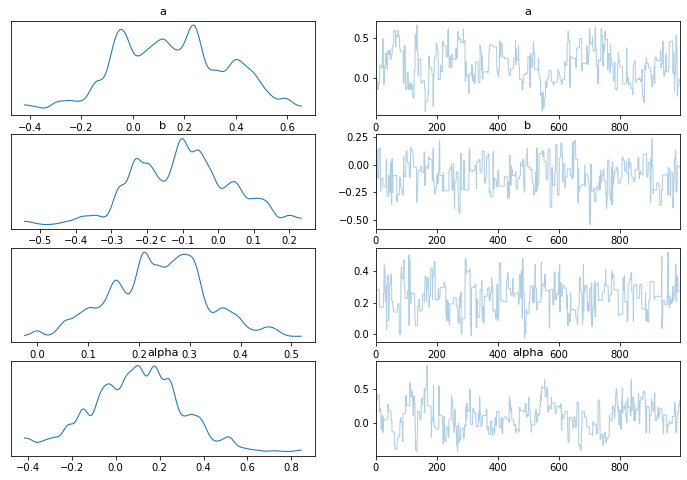

In [10]:
with model:
    trace_MH_LARGE = pm.sample(draws=1000, chains=1, step=pm.Metropolis(proposal_sd=0.0001),random_seed=1)

pm.plot_trace(trace_MH_LARGE)
plt.show()

# pm.plot_posterior(trace_MH_LARGE, var_names=['a', 'b', 'c', 'alpha'])
# pm.summary(trace_MH_LARGE)

The result indicates that when sample  is 1000, the model converges and the model samples from a stable distribution. So can get a relatively smooth distribution of parameters.

# 2. Different sizes for the proposal distribution

Theoretically, A larger proposal_sd will result in larger proposed jumps, thus can be useful for quickly exploring the parameter space and avoiding local minima. Also, a larger proposal_sd can lead to a higher rejection rate and lower acceptance probability. The standard deviation of the proposal distribution determines the scale of the distribution and the size of the proposed jumps in the parameter space.

## Compare trace plots of different sizes for the proposal distribution

### Trace plot when proposal_sd is 0.0001

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


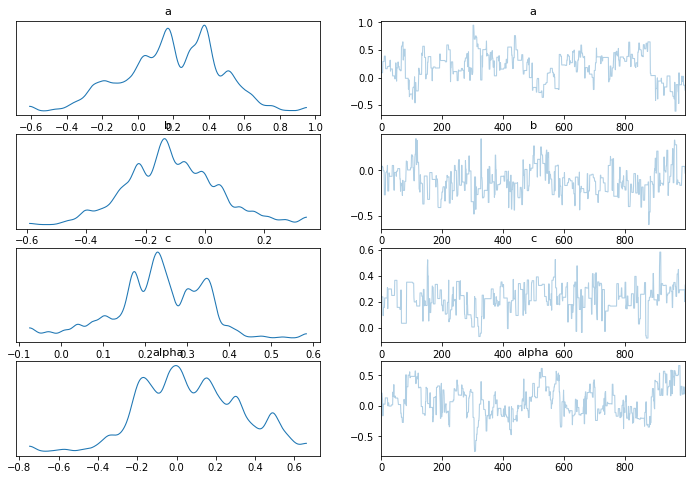

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.193,0.259,-0.272,0.647,0.056,0.040,24.0,64.0,NaN
b,-0.111,0.151,-0.406,0.165,0.020,0.014,62.0,125.0,NaN
c,0.230,0.106,0.038,0.420,0.013,0.010,71.0,97.0,NaN
alpha,0.076,0.245,-0.272,0.580,0.050,0.036,25.0,76.0,NaN


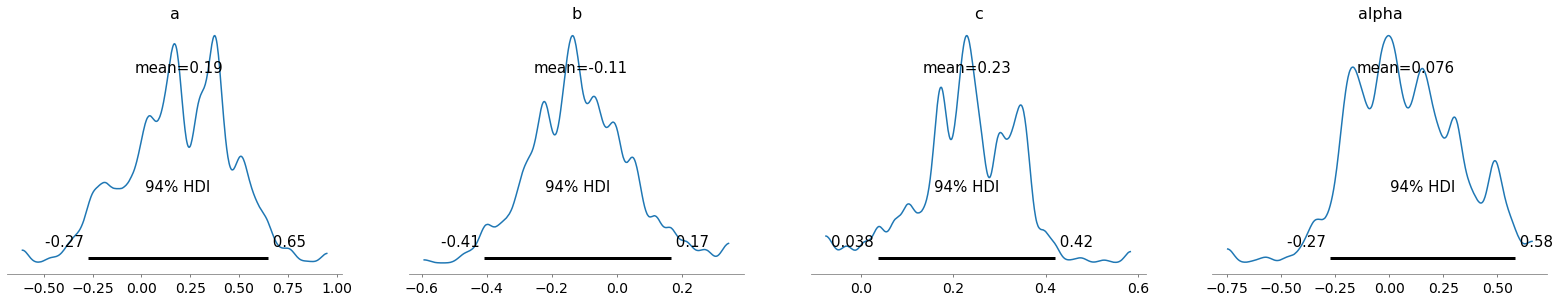

In [11]:
with model:
    trace_MH_LARGE = pm.sample(draws=1000, chains=1, step=pm.Metropolis(proposal_sd=0.0001,random_seed=1))
pm.plot_trace(trace_MH_LARGE)
plt.show()

pm.plot_posterior(trace_MH_LARGE, var_names=['a', 'b', 'c', 'alpha'])
pm.summary(trace_MH_LARGE)

When the proposal_sd is set to 0.0001, the trace plots show a slow and steady exploration of the parameter space, with little fluctuation in the sampled values. This indicates that the MCMC algorithm is converging to the stationary distribution and is accurately exploring the posterior distribution.

### Trace plot when proposal_sd is 0.01

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


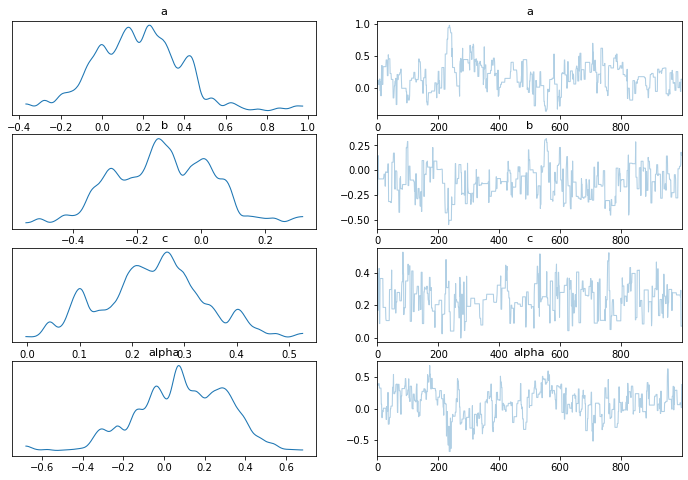

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.178,0.216,-0.215,0.554,0.040,0.028,29.0,102.0,NaN
b,-0.118,0.152,-0.430,0.105,0.017,0.013,81.0,88.0,NaN
c,0.240,0.097,0.070,0.423,0.008,0.006,140.0,191.0,NaN
alpha,0.088,0.222,-0.349,0.436,0.043,0.031,27.0,114.0,NaN


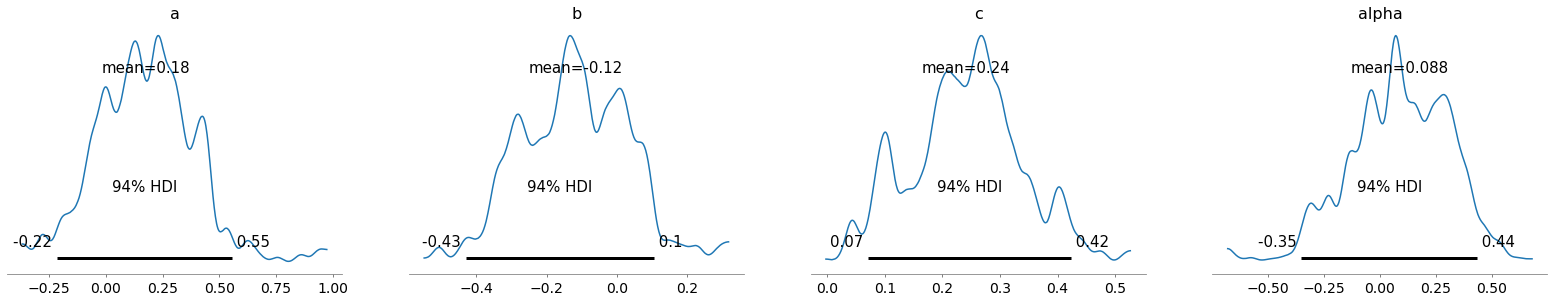

In [12]:
with model:
    trace_MH_LARGE = pm.sample(draws=1000, chains=1, step=pm.Metropolis(proposal_sd=0.01,random_seed=1))

pm.plot_trace(trace_MH_LARGE)
plt.show()

pm.plot_posterior(trace_MH_LARGE, var_names=['a', 'b', 'c', 'alpha'])
pm.summary(trace_MH_LARGE)

When the proposal_sd is set to 0.01, the trace plots show a more rapid exploration of the parameter space, with larger fluctuations in the sampled values. This can allow the MCMC algorithm to more quickly explore the entire parameter space and avoid getting stuck in local minima.

### Trace plot when proposal_sd is 10

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


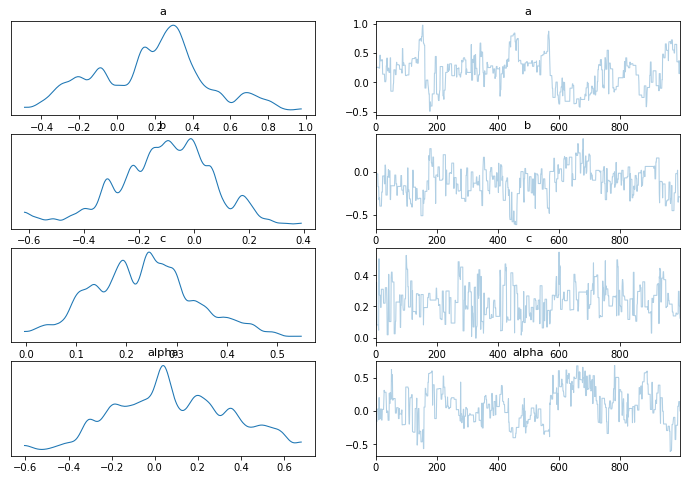

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.178,0.287,-0.333,0.728,0.061,0.044,24.0,51.0,NaN
b,-0.106,0.172,-0.401,0.224,0.032,0.023,29.0,88.0,NaN
c,0.235,0.102,0.067,0.454,0.008,0.006,169.0,167.0,NaN
alpha,0.086,0.262,-0.317,0.599,0.051,0.036,28.0,103.0,NaN


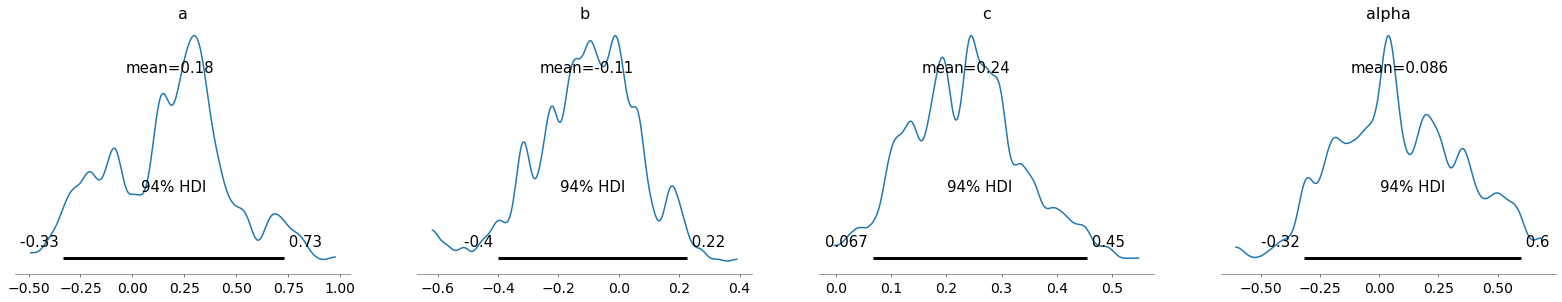

In [13]:
with model:
    trace_MH_LARGE = pm.sample(draws=1000, chains=1, step=pm.Metropolis(proposal_sd=10,random_seed=1))

pm.plot_trace(trace_MH_LARGE)
plt.show()

pm.plot_posterior(trace_MH_LARGE, var_names=['a', 'b', 'c', 'alpha'])
pm.summary(trace_MH_LARGE)

When the proposal_sd is set to 10, the trace plots show a rapid exploration of the parameter space, with large fluctuations in the sampled values. This can allow the MCMC algorithm to quickly explore the whole posterior distribution.

## Acceptance Probability in different sizes for the proposal distribution

In [38]:
# run the MCMC sampling with different sizes for the proposal distribution
proposal_sizes = [0.0001, 0.001, 0.1, 1, 5, 7, 10]
traces = []
for size in proposal_sizes:
    with model:
        # run the MCMC sampling with the Metropolis algorithm and the specified proposal size
        trace = pm.sample(draws=1000, chains=1, step=pm.Metropolis(proposal_sd=size,random_seed=1))
        traces.append(trace)

In [39]:
trace['accepted']

array([[ True, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       ...,
       [False, False, False,  True],
       [False, False,  True, False],
       [ True, False, False,  True]])

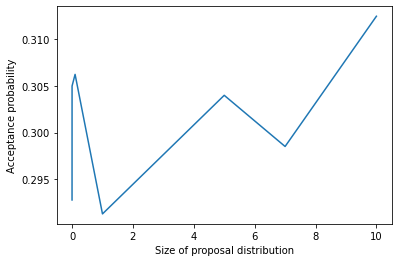

In [40]:
# calculate the acceptance probabilities for each trace object
acceptance_probabilities = []
for trace in traces:
    acceptance_probability = trace['accepted'].mean()
    acceptance_probabilities.append(acceptance_probability)
# plot the acceptance probability as a function of the size of the proposal distribution
plt.plot(proposal_sizes, acceptance_probabilities)
plt.xlabel('Size of proposal distribution')
plt.ylabel('Acceptance probability')
plt.show()


From the  rsults above, we can conclude that the choice of proposal_sd can have a great impact on the acceptance probability. Overall, when proposal_sd is larger than 1, as the size of  proposal distribution grows larger the acceptance probability is a bit higher. The size of the proposal distribution determines the size of the jumps made by the algorithm as it explores the state space of the model. Larger proposal distribution will result in larger jumps and may allow the algorithm to explore a wider range of the state space. When the proposal_sdis lower than 1, the acceptance probability have no obvious rule. In this case the proposal distribution is restricted, the model will be less likely to  accept the proposed sample.


# 3. Analysis on a ‘reasonable’ proposal distribution

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


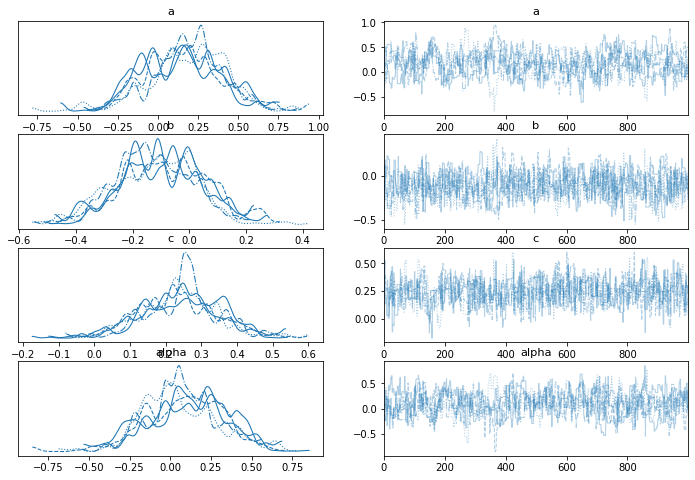

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.163,0.238,-0.264,0.591,0.018,0.013,183.0,378.0,1.02
b,-0.105,0.146,-0.382,0.151,0.008,0.006,304.0,620.0,1.02
c,0.242,0.109,0.031,0.435,0.005,0.003,552.0,646.0,1.01
alpha,0.092,0.234,-0.318,0.516,0.017,0.012,197.0,335.0,1.02


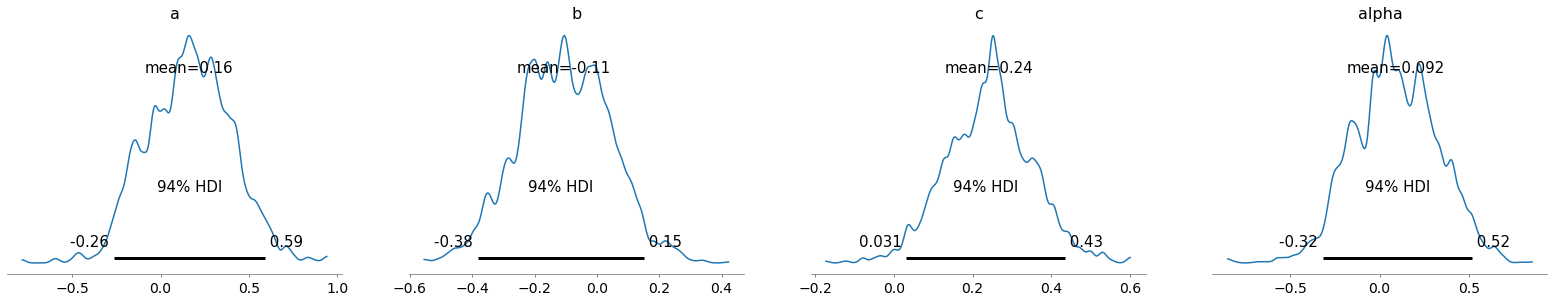

In [44]:
with model:
    trace_MH_r = pm.sample(draws=1000, chains=5, step=pm.Metropolis(proposal_sd=1,random_seed=1))

pm.plot_trace(trace_MH_r)
plt.show()

pm.plot_posterior(trace_MH_r, var_names=['a', 'b', 'c', 'alpha'])
pm.summary(trace_MH_r)

## Variance

In [45]:
# extract the posterior samples for each parameter
a_samples = trace_MH_r.get_values('a')
b_samples = trace_MH_r.get_values('b')
c_samples = trace_MH_r.get_values('c')
alpha_samples = trace_MH_r.get_values('alpha')
# calculate the average value of each parameter

a_mean = np.mean(a_samples)
b_mean = np.mean(b_samples)
c_mean = np.mean(c_samples)
alpha_mean = np.mean(alpha_samples)

# calculate the variance of each parameter

a_var = np.var(a_samples)
b_var = np.var(b_samples)
c_var = np.var(c_samples)
alpha_var = np.var(alpha_samples)

# calculate the covariance between the parameters
cov = np.cov([ a_samples, b_samples, c_samples, alpha_samples])


In [46]:
print(a_var, b_var, c_var, alpha_var)

0.05668172866607415 0.021404538629798808 0.011786249498767862 0.05464176384382132


## Covariance

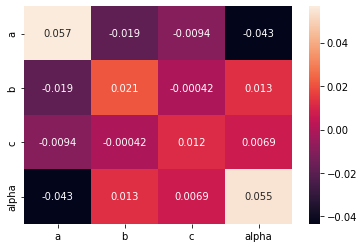

In [48]:
# plot the covariance
sns.heatmap(cov, annot=True, xticklabels=['a', 'b', 'c', 'alpha'], yticklabels=['a', 'b', 'c', 'alpha'])
plt.show()

## Pairplot

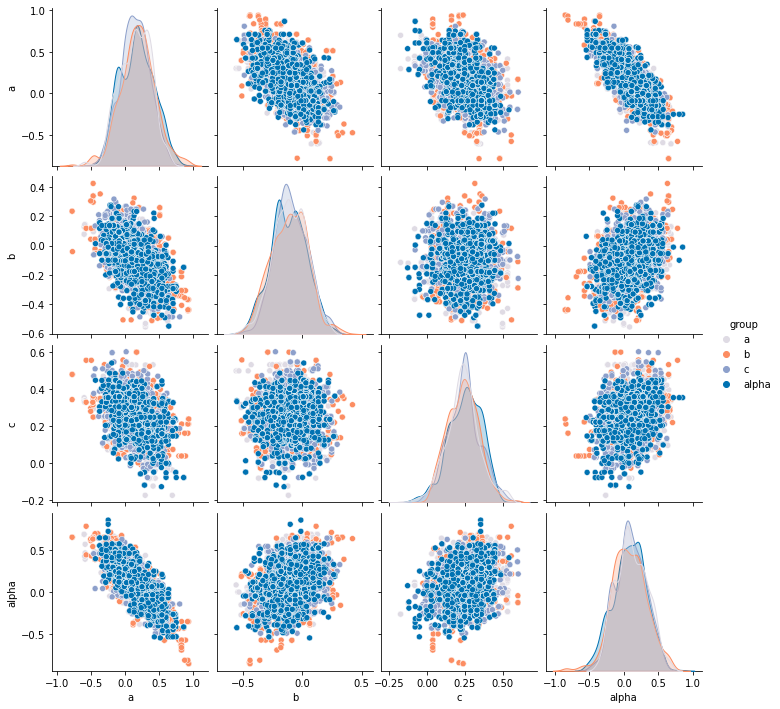

In [50]:
# Convert the NumPy arrays to Series
a_series = pd.Series(a_samples)
b_series = pd.Series(b_samples)
c_series = pd.Series(c_samples)
alpha_series = pd.Series(alpha_samples)

# Concatenate the Series into a single DataFrame
samples = pd.concat([a_series, b_series, c_series, alpha_series], axis=1)

# Rename the columns of the DataFrame
samples.columns = ['a', 'b', 'c', 'alpha']

# Define the group variable as a list of values
# Create a list of 4000 values
group = ['a'] * 1250 + ['b'] * 1250 + ['c'] * 1250 + ['alpha'] * 1250


# Add the group column to the DataFrame
samples['group'] = group

# Draw the pairplot with the samples colored by group
sns.pairplot(samples, hue='group', palette=['#dfdbe4', '#FC8D62', '#8DA0CB', '#0072B2'])



# 4. Marginalise over the nuisance parameters and plot the posterior distribution of alpha

In [51]:
samples = np.concatenate((a_samples, b_samples, c_samples, alpha_samples), axis=0)

# Marginal posterior distributions for each parameter
marginal_a = np.average(a_samples, weights=np.exp(-0.5*(samples[3] - alpha_samples)**2))
marginal_b = np.average(b_samples, weights=np.exp(-0.5*(samples[3] - alpha_samples)**2))
marginal_c = np.average(c_samples, weights=np.exp(-0.5*(samples[3] - alpha_samples)**2))

# Marginal posterior for alpha
marginal_alpha = alpha_samples


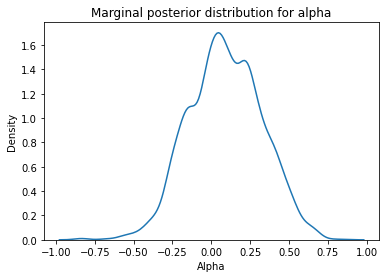

In [52]:
sns.kdeplot(marginal_alpha)

plt.title("Marginal posterior distribution for alpha")
plt.xlabel("Alpha")
plt.ylabel("Density")

plt.show()

# 5. When don’t consider the nuisance parameters

In [53]:
pm.set_tt_rng(1)

with pm.Model() as model2:
    # Define the prior distributions for the model parameters
    a = 0
    b = 0
    c = 0
    alpha = pm.Uniform('alpha', lower=-1, upper=1)

    # Define the likelihood function
    likelihood = -1/2*((dx[0]-(c-0.160*b-1.261*a-0.587*alpha))**2/(2*sigma0**2)+
                     (dx[1]-(c-1.107*b-0.160*a-0.557*alpha))**2/(2*sigma0**2)+
                     (dx[2]-(c+0.472*b+0.334*a-0.186*alpha))**2/(2*sigma0**2)+
                     (dx[3]-(c+0.360*b+0.348*a-0.222*alpha))**2/(2*sigma0**2)+
                     (dx[4]-(c+1.099*b+0.587*a+0.080*alpha))**2/(2*sigma0**2)+
                     (dx[5]-(c+1.321*b+0.860*a+0.158*alpha))**2/(2*sigma0**2)+
                     (dx[6]-(c-0.328*b+1.079*a+1.540*alpha))**2/(2*sigma0**2))

     
    pm.Potential('obs', likelihood)



/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


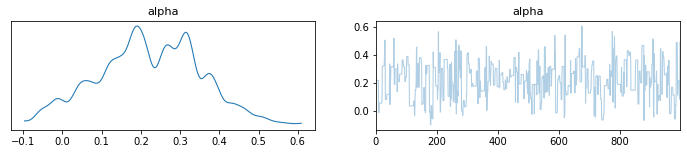

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.221,0.129,-0.033,0.447,0.009,0.006,216.0,243.0,NaN


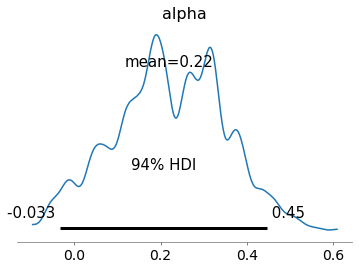

In [54]:
with model2:
    trace_MH2 = pm.sample(draws=1000, chains=1, step=pm.Metropolis(random_seed=1))

pm.plot_trace(trace_MH2)
plt.show()

pm.plot_posterior(trace_MH2, var_names=['alpha'])
pm.summary(trace_MH2)


When we don’t consider the nuisance parameters, the estimated alpha is much bigger.

From all results above we can conclude that, the posterior distribution of alpha from these observed data has a mean value from 0.076, 0.09 to 0.11. After multiplying these alpha mean value by 45.3 the inferred alpha is from 3.4428, 4.077 to 4.983. The MCMC model result supports GR theory.